In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [3]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-06-19--16h-55m-31s',
 '2025-06-19--16h-57m-05s',
 '2025-06-19--16h-58m-48s',
 '2025-06-19--17h-00m-31s',
 '2025-06-19--17h-02m-15s',
 '2025-06-19--17h-03m-59s',
 '2025-06-19--17h-05m-44s',
 '2025-06-19--17h-07m-30s',
 '2025-06-19--17h-09m-16s',
 '2025-06-19--17h-11m-01s',
 '2025-06-19--17h-12m-46s',
 '2025-06-19--17h-14m-32s',
 '2025-06-19--17h-16m-18s',
 '2025-06-19--17h-18m-01s',
 '2025-06-19--17h-20m-01s',
 '2025-06-19--17h-21m-46s',
 '2025-06-19--17h-23m-32s',
 '2025-06-19--17h-25m-16s',
 '2025-06-19--17h-27m-03s',
 '2025-06-19--17h-28m-47s',
 '2025-06-19--17h-30m-32s',
 '2025-06-19--17h-32m-18s',
 '2025-06-19--17h-34m-03s',
 '2025-06-19--17h-35m-49s',
 '2025-06-19--17h-37m-34s',
 '2025-06-19--17h-39m-18s',
 '2025-06-19--17h-41m-02s',
 '2025-06-19--17h-43m-02s',
 '2025-06-19--17h-44m-46s',
 '2025-06-19--17h-46m-30s',
 '2025-06-19--17h-48m-16s',
 '2025-06-19--17h-50m-00s',
 '2025-06-19--17h-51m-45s',
 '2025-06-19--17h-53m-29s',
 '2025-06-19--17h-55m-14s',
 '2025-06-19--17h-57

In [4]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "corrected_estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    # if repetitions is not in params, set it to 1
    if "repetitions" not in params.columns:
        params["repetitions"] = pd.Series([1])
    else:
        params["repetitions"] = params["repetitions"].astype(int)

    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "corrected_estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi
0,2025-06-19--16h-55m-31s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
1,2025-06-19--16h-55m-31s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
2,2025-06-19--16h-55m-31s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
3,2025-06-19--16h-55m-31s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
4,2025-06-19--16h-55m-31s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
223051,2025-06-19--18h-48m-00s,97.0,60.0,1.0,42.0,200.0,1.480674,1.518377,1.518377,1.570796,1.570796
223052,2025-06-19--18h-48m-00s,95.0,53.0,1.0,51.0,200.0,1.560796,1.516354,1.516354,1.570796,1.570796
223053,2025-06-19--18h-48m-00s,104.0,52.0,0.0,44.0,200.0,1.530786,NaN,1.570796,1.570796,1.570796
223054,2025-06-19--18h-48m-00s,93.0,53.0,1.0,53.0,200.0,1.570796,1.514321,1.514321,1.570796,1.570796


In [5]:
estimates_df[estimates_df["N"] > 201][estimates_df["theta"] == 0]

/tmp/ipykernel_1152096/3925035558.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  estimates_df[estimates_df["N"] > 201][estimates_df["theta"] == 0]


,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi
3575,2025-06-19--16h-55m-31s,15.0,62551.0,74.0,0.0,62640.0,0.053313,0.416258,0.416258,0.0,0.000000
48975,2025-06-19--17h-18m-01s,23.0,61728.0,89.0,0.0,61840.0,0.060194,0.464734,0.464734,0.0,0.785398
94000,2025-06-19--17h-41m-02s,20.0,62207.0,93.0,0.0,62320.0,0.060229,0.427740,0.427740,0.0,1.570796


# Load Theory Curves

In [6]:
theta_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'theta_estimator_stats.csv'))
theta_theory

,theta,n,theta_estimator_mean,theta_estimator_variance
0,0.000000,40,0.000000,0.000000
1,0.006283,40,0.000177,0.000040
2,0.012566,40,0.000707,0.000158
3,0.018850,40,0.001589,0.000354
4,0.025133,40,0.002820,0.000626
...,...,...,...,...
2500,3.116460,200,3.135388,0.000594
2501,3.122743,200,3.138075,0.000343
2502,3.129026,200,3.140020,0.000156
2503,3.135309,200,3.141198,0.000039


In [7]:
delta_phi_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'delta_phi_estimator_stats.csv'))
delta_phi_theory

,delta_phi,theta,n,delta_phi_estimator_mean,delta_phi_estimator_variance
0,0.000000,0.785398,40,0.000000,0.000000
1,0.003142,0.785398,40,0.000031,0.000010
2,0.006283,0.785398,40,0.000126,0.000041
3,0.009425,0.785398,40,0.000283,0.000092
4,0.012566,0.785398,40,0.000503,0.000164
...,...,...,...,...,...
7510,1.558230,1.570796,200,1.569223,0.000156
7511,1.561372,1.570796,200,1.569909,0.000088
7512,1.564513,1.570796,200,1.570402,0.000039
7513,1.567655,1.570796,200,1.570698,0.000010


In [ ]:
overlap_adjusted_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'phase_estimation_multiN.csv'))
overlap_adjusted_theory = overlap_adjusted_theory

# Plot VarCRB_scaled against delta_phi for each N from overlap_adjusted_theory
def plot_varcrb_scaled_vs_delta_phi(df):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="delta_phi", y="bias", hue="N", marker="o")
    plt.title("Scaled Variance of CRB vs. Delta Phi for Different N")
    plt.xlabel("Delta Phi")
    plt.ylabel("Scaled Variance of CRB")
    plt.legend(title="N", loc='upper right')
    plt.grid(True)
    plt.show()
plot_varcrb_scaled_vs_delta_phi(overlap_adjusted_theory)

# Theta

In [ ]:
# round N to the nearest 40
estimates_df["nearest_40_N"] = estimates_df["N"].apply(lambda x: 0 if x > 200 else round(x / 40) * 40)
estimates_df

,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi,nearest_40_N
0,2025-06-19--16h-55m-31s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
1,2025-06-19--16h-55m-31s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
2,2025-06-19--16h-55m-31s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
3,2025-06-19--16h-55m-31s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
4,2025-06-19--16h-55m-31s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
...,...,...,...,...,...,...,...,...,...,...,...,...
223051,2025-06-19--18h-48m-00s,97.0,60.0,1.0,42.0,200.0,1.480674,1.518377,1.518377,1.570796,1.570796,200
223052,2025-06-19--18h-48m-00s,95.0,53.0,1.0,51.0,200.0,1.560796,1.516354,1.516354,1.570796,1.570796,200
223053,2025-06-19--18h-48m-00s,104.0,52.0,0.0,44.0,200.0,1.530786,NaN,1.570796,1.570796,1.570796,200
223054,2025-06-19--18h-48m-00s,93.0,53.0,1.0,53.0,200.0,1.570796,1.514321,1.514321,1.570796,1.570796,200


In [ ]:
theta_estimates = estimates_df.groupby(["N", "theta", "delta_phi"]).agg({
    "theta_estimate": ["mean", "std", "var",],
    "theta": "count",
    "delta_phi_estimate": ["mean", "std", "var"]
}).reset_index().rename(columns={"nearest_40_N": "N (rounded to nearest 40)"})
theta_estimates.columns = ['_'.join(col).strip() for col in theta_estimates.columns.values]
theta_estimates

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,40.0,0.000000,0.000000,0.012568,0.051941,0.002698,1566,NaN,NaN,NaN
1,40.0,0.000000,0.785398,0.015642,0.058283,0.003397,1546,0.785398,NaN,NaN
2,40.0,0.000000,1.570796,0.015581,0.058337,0.003403,1558,0.785398,0.000000,0.000000
3,40.0,0.261799,0.000000,0.212265,0.144644,0.020922,1563,0.678247,0.111989,0.012541
4,40.0,0.261799,0.785398,0.194619,0.141496,0.020021,1539,0.771814,0.121368,0.014730
...,...,...,...,...,...,...,...,...,...,...
354,62320.0,0.000000,1.570796,0.060229,NaN,NaN,1,0.427740,NaN,NaN
355,62320.0,0.261799,1.570796,0.235901,NaN,NaN,1,1.309396,NaN,NaN
356,62520.0,0.261799,0.000000,0.256285,NaN,NaN,1,0.151617,NaN,NaN
357,62520.0,1.047198,0.000000,1.025750,NaN,NaN,1,0.099573,NaN,NaN


## Mean

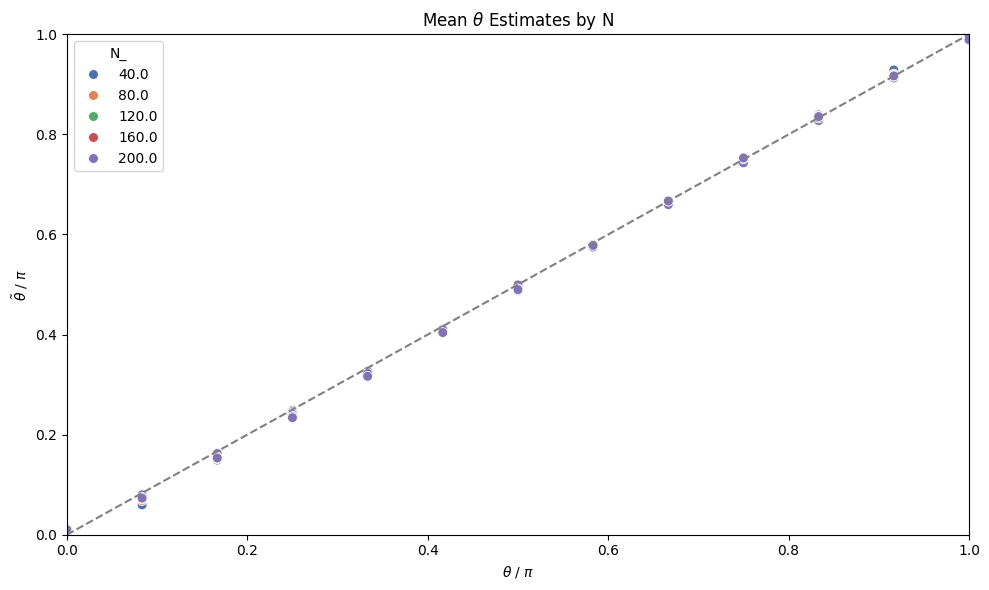

In [ ]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"] < 201],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\tilde{\theta}$ / $\pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.title(r"Mean $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0, 1)
# no legend

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_theta_estimates_by_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

## Error

### Uncompensated

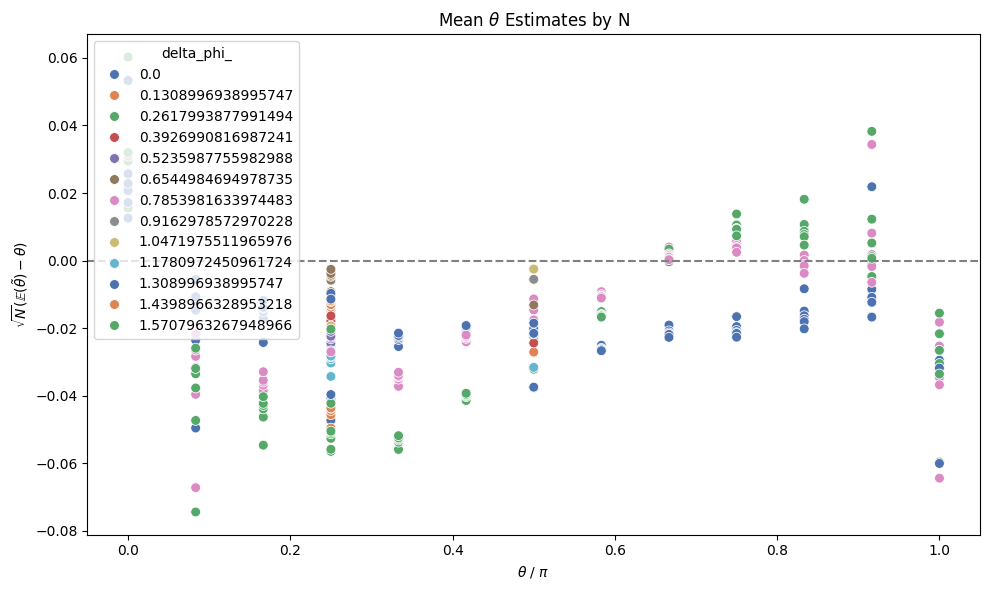

In [ ]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=theta_estimates["theta_"] / np.pi,
    y=(theta_estimates["theta_estimate_mean"] - theta_estimates["theta_"])
    #* np.sqrt(
    #    theta_estimates["N_"]
    #)
    ,
    hue=theta_estimates["delta_phi_"],
    # hue=theta_estimates["N_"],

    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\sqrt{N} (\mathbb{E}(\tilde{\theta}) - \theta)$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")

plt.title(r"Mean $\theta$ Estimates by N")
# no legend

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_theta_estimates_by_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

### Compensated

## Variance

### Without Theory

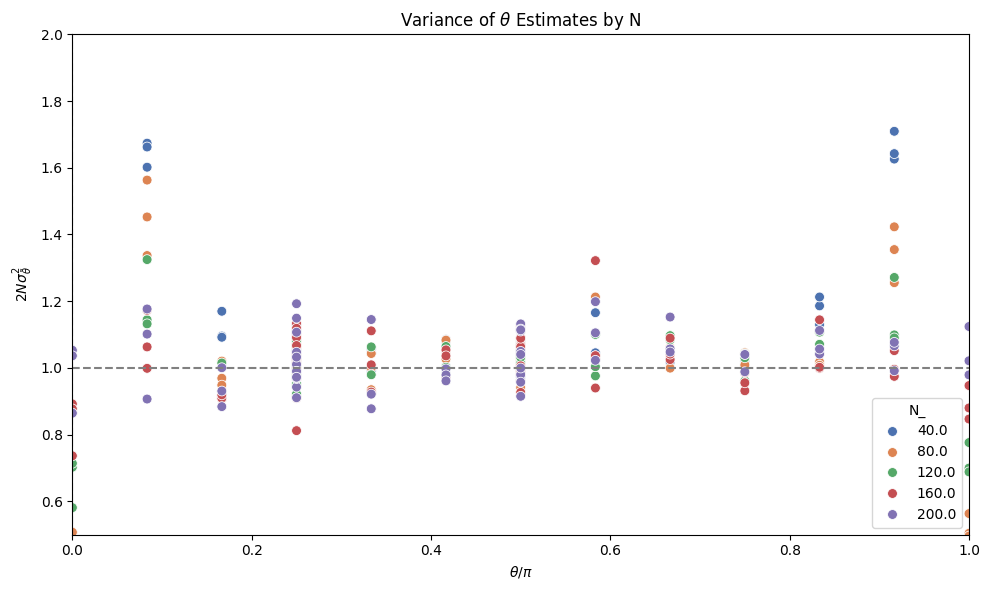

In [ ]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

### With Theory

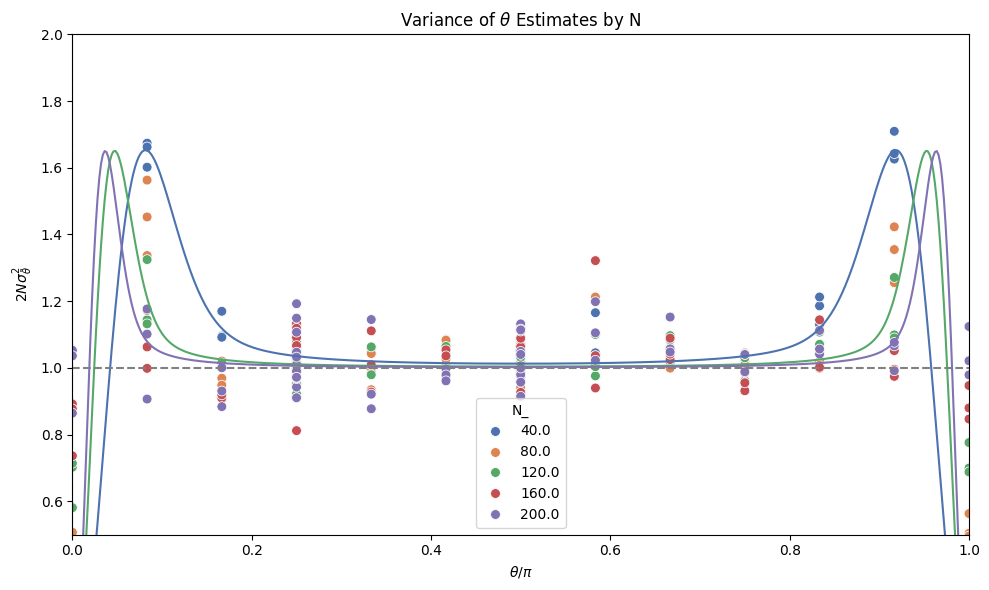

In [ ]:
# plot theta_estimates with the theory curve
plt.figure(figsize=(10, 6))

N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette=color_dict,
    s=50,
)

# Add theory curve line
theta_theory_plot = theta_theory[theta_theory["n"].isin([40, 120, 200])]
sns.lineplot(
    data=theta_theory_plot,
    x=theta_theory_plot["theta"] / np.pi,
    y=theta_theory_plot["theta_estimator_variance"] * 2 * theta_theory_plot["n"],
    hue=theta_theory_plot["n"],
    palette=color_dict,
    legend=False,
)

plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

# Delta Phi

In [ ]:
# only when theta = pi/2 or pi/4
delta_phi_estimates = estimates_df.groupby(["N", "theta", "delta_phi"]).agg({
    "delta_phi_estimate": ["mean", "std", "var",],
    "delta_phi": "count",
    "theta_estimate": ["mean", "std", "var"]
}).reset_index()
delta_phi_estimates.columns = ['_'.join(col).strip() for col in delta_phi_estimates.columns.values]
delta_phi_estimates

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,40.0,0.000000,0.000000,NaN,NaN,NaN,1566,0.012568,0.051941,0.002698
1,40.0,0.000000,0.785398,0.785398,NaN,NaN,1546,0.015642,0.058283,0.003397
2,40.0,0.000000,1.570796,0.785398,0.000000,0.000000,1558,0.015581,0.058337,0.003403
3,40.0,0.261799,0.000000,0.678247,0.111989,0.012541,1563,0.212265,0.144644,0.020922
4,40.0,0.261799,0.785398,0.771814,0.121368,0.014730,1539,0.194619,0.141496,0.020021
...,...,...,...,...,...,...,...,...,...,...
354,62320.0,0.000000,1.570796,0.427740,NaN,NaN,1,0.060229,NaN,NaN
355,62320.0,0.261799,1.570796,1.309396,NaN,NaN,1,0.235901,NaN,NaN
356,62520.0,0.261799,0.000000,0.151617,NaN,NaN,1,0.256285,NaN,NaN
357,62520.0,1.047198,0.000000,0.099573,NaN,NaN,1,1.025750,NaN,NaN


#### Theta = pi/2

In [ ]:
# get the subset where theta = pi/2 using numpy to find theta close to pi/2

delta_phi_estimates_theta_pi_over_2 = delta_phi_estimates[
    np.isclose(delta_phi_estimates["theta_"], np.pi / 2, atol=0.001)
].reset_index(drop=True)
delta_phi_estimates_theta_pi_over_2

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,40.0,1.570796,0.000000,0.230068,0.048733,0.002375,3082,1.550645,0.113547,0.012893
1,40.0,1.570796,0.130900,0.244335,0.056796,0.003226,1514,1.548951,0.113666,0.012920
2,40.0,1.570796,0.261799,0.283622,0.078505,0.006163,1504,1.548148,0.111590,0.012452
3,40.0,1.570796,0.392699,0.373674,0.106792,0.011405,1508,1.546282,0.112701,0.012702
4,40.0,1.570796,0.523599,0.475884,0.121895,0.014858,1493,1.548989,0.112970,0.012762
...,...,...,...,...,...,...,...,...,...,...
75,60320.0,1.570796,0.392699,0.373279,NaN,NaN,1,1.546440,NaN,NaN
76,60320.0,1.570796,0.654498,0.613523,NaN,NaN,1,1.557666,NaN,NaN
77,60560.0,1.570796,0.130900,0.143122,NaN,NaN,1,1.549097,NaN,NaN
78,61240.0,1.570796,0.000000,0.101834,NaN,NaN,1,1.552294,NaN,NaN


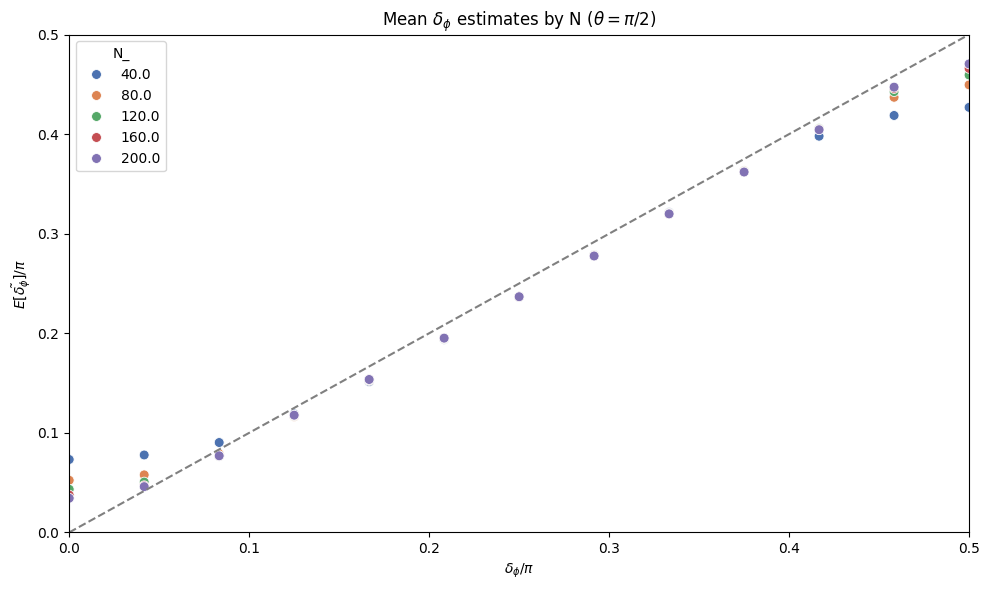

In [ ]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[
        delta_phi_estimates_theta_pi_over_2["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")

plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()
plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

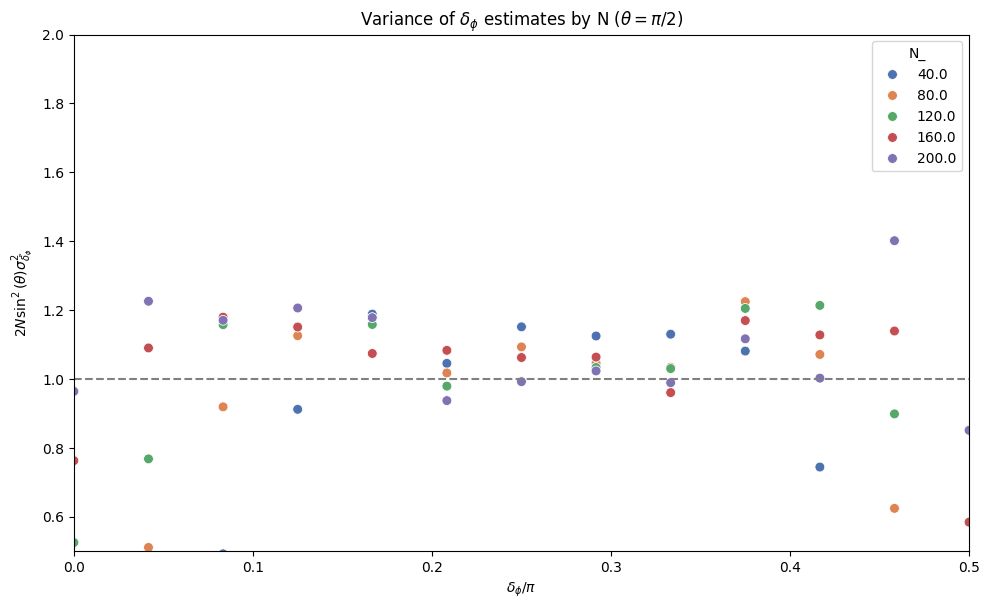

In [ ]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[delta_phi_estimates_theta_pi_over_2["N_"].isin([40, 80, 120, 160, 200])],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_var"] * 2 * delta_phi_estimates_theta_pi_over_2["N_"] * np.sin(delta_phi_estimates_theta_pi_over_2["theta_"]) **2,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlim(0, 1/2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\theta) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$")

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_1143699/4045133925.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  theory_filtered = delta_phi_theory[


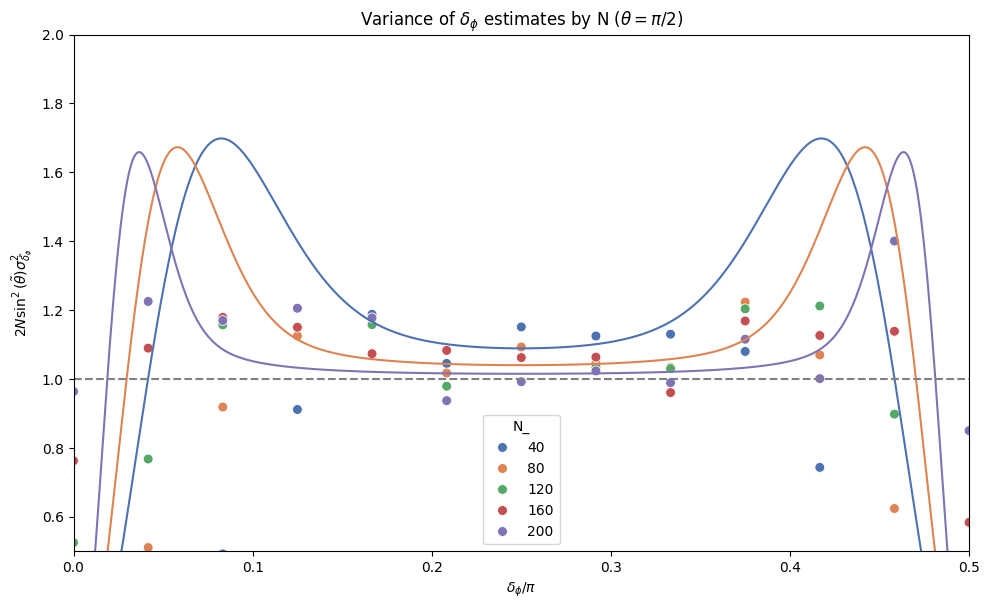

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_2[
    delta_phi_estimates_theta_pi_over_2["N_"].isin(N_values)
]
theory_filtered = delta_phi_theory[
    delta_phi_theory["n"].isin([40, 80, 200])  # Can be different subset
][delta_phi_theory["theta"] == np.pi / 2]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean"]) ** 2,
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot theory lines
sns.lineplot(
    data=theory_filtered,
    x=theory_filtered["delta_phi"] / np.pi,
    y=theory_filtered["delta_phi_estimator_variance"]
    * 2
    * theory_filtered["n"]
    * np.sin(theory_filtered["theta"]) ** 2,
    hue="n",
    palette=color_dict,
    legend=False,  # Disable legend for theory lines
)

plt.xlim(0, 1 / 2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_1143699/899911652.py:16: RuntimeWarning: divide by zero encountered in divide
  cramer_rao = 1 / fisher_information


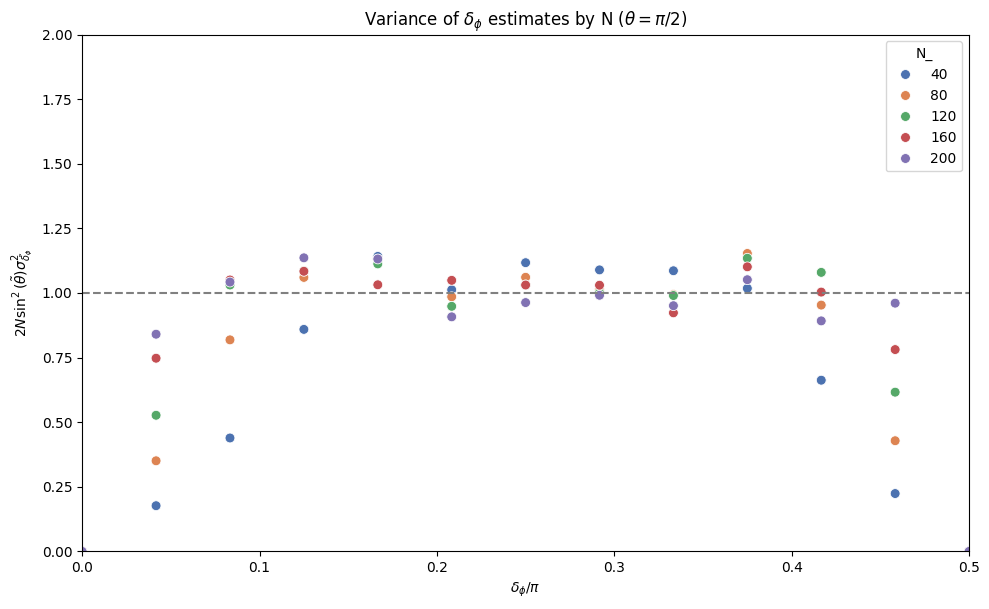

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Cramér-Rao bound data
eta = 0.985
delta_phi_range = np.linspace(0, np.pi / 2, 100)
fisher_information = (
    eta**2 * np.sin(2*delta_phi_range) ** 2 / (1 - eta**2 * np.cos(2*delta_phi_range) ** 2)
)
cramer_rao = 1 / fisher_information

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean"]) ** 2
    * eta**2 * np.sin(2*data_filtered["delta_phi_"]) ** 2 / (1 - eta**2 * np.cos(2*data_filtered["delta_phi_"]) ** 2),
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot the cramér-rao bound
# sns.lineplot(
#     x=delta_phi_range / np.pi,
#     y=cramer_rao,
#     color="black",
#     label="Cramér-Rao Bound",
#     linestyle="--",
# )

plt.xlim(0, 1 / 2)
plt.ylim(0, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Theta = pi/4

In [ ]:
delta_phi_estimates_theta_pi_over_4 = delta_phi_estimates[delta_phi_estimates["theta_"] == np.pi / 4]
delta_phi_estimates_theta_pi_over_4

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
9,40.0,0.785398,0.000000,0.326280,0.064423,0.004150,3084,0.768205,0.113419,0.012864
10,40.0,0.785398,0.130900,0.334811,0.070890,0.005025,1538,0.767144,0.111301,0.012388
11,40.0,0.785398,0.261799,0.363678,0.089377,0.007988,1530,0.758432,0.112755,0.012714
12,40.0,0.785398,0.392699,0.416277,0.114053,0.013008,1535,0.762295,0.113698,0.012927
13,40.0,0.785398,0.523599,0.509610,0.150465,0.022640,1526,0.757504,0.114784,0.013175
...,...,...,...,...,...,...,...,...,...,...
341,61400.0,0.785398,0.392699,0.347662,NaN,NaN,1,0.769057,NaN,NaN
344,61520.0,0.785398,0.130900,0.142158,NaN,NaN,1,0.773563,NaN,NaN
346,61560.0,0.785398,0.000000,0.108541,NaN,NaN,1,0.775714,NaN,NaN
347,61800.0,0.785398,0.000000,0.110721,NaN,NaN,1,0.774010,NaN,NaN


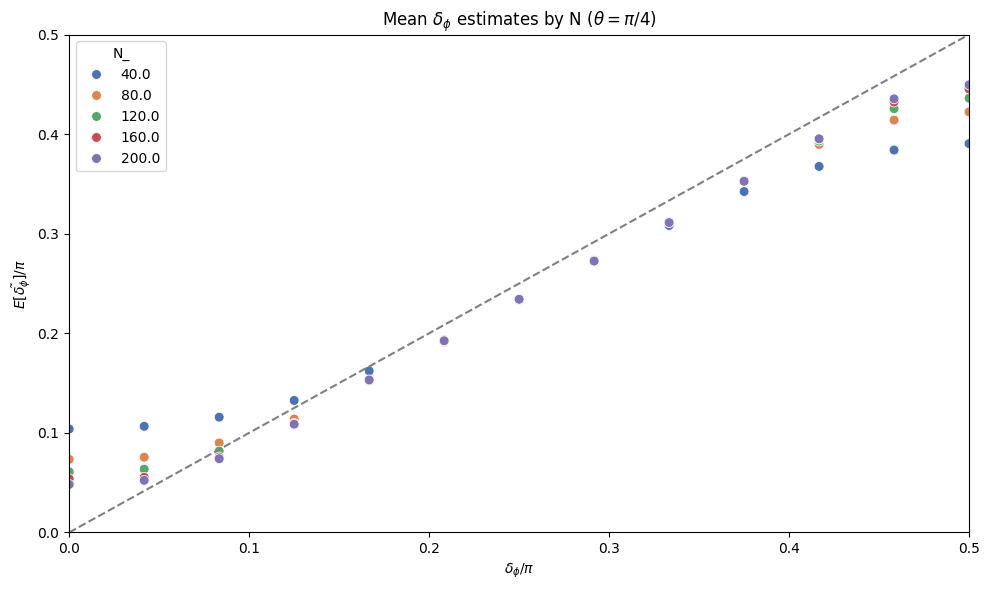

In [ ]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[
        delta_phi_estimates_theta_pi_over_4["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_4["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)


plt.xlabel(r"$\delta_{\phi} / \pi$")

plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

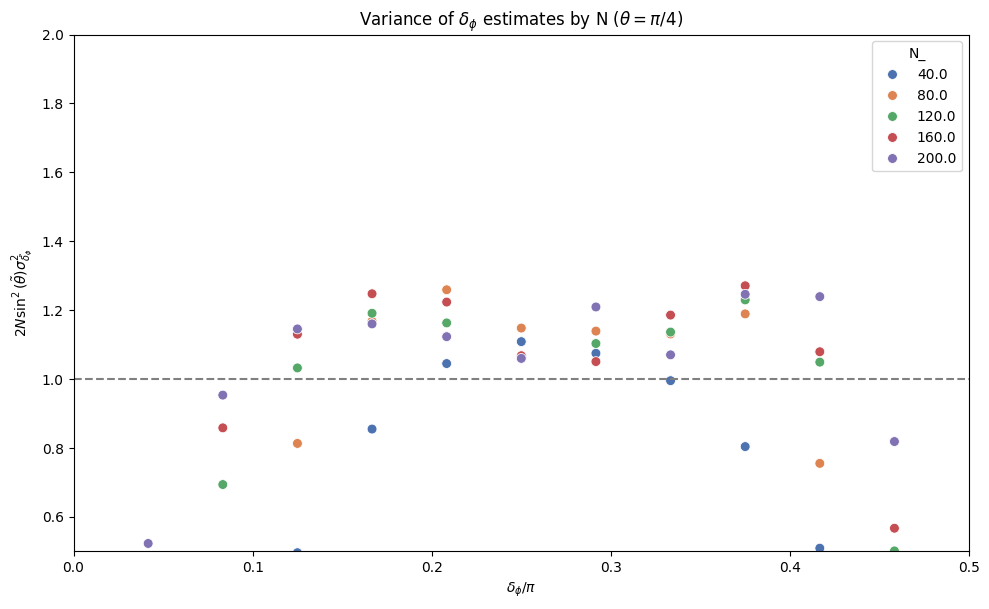

In [ ]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[
        delta_phi_estimates_theta_pi_over_4["N_"].isin([40, 80, 120, 160, 200])
    ],
    x=delta_phi_estimates_theta_pi_over_4["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_var"]
    * 2
    * delta_phi_estimates_theta_pi_over_4["N_"]
    * np.sin(delta_phi_estimates_theta_pi_over_4["theta_estimate_mean"]) ** 2,
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlim(0, 1 / 2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_1143699/2932750281.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  theory_filtered = delta_phi_theory[


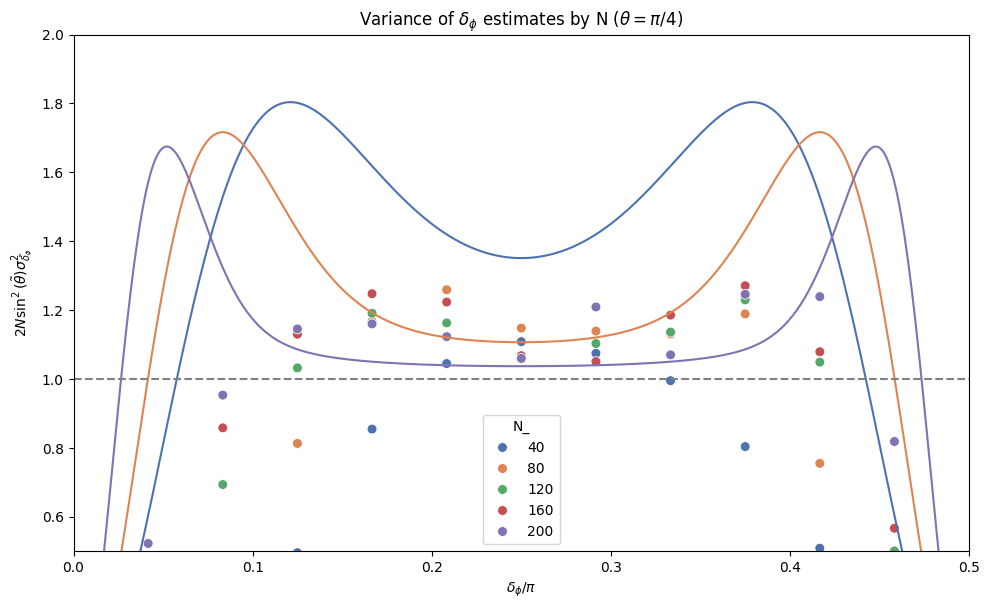

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
]
theory_filtered = delta_phi_theory[
    delta_phi_theory["n"].isin([40, 80, 200])  # Adjust if needed
][delta_phi_theory["theta"] == np.pi * 0.25]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean"]) ** 2,
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot theory lines
sns.lineplot(
    data=theory_filtered,
    x=theory_filtered["delta_phi"] / np.pi,
    y=theory_filtered["delta_phi_estimator_variance"]
    * 2
    * theory_filtered["n"]
    * np.sin(theory_filtered["theta"])
    ** 2,  # * 2 * theory_filtered["n"] * np.sin(theory_filtered["theta"]) ** 2,
    hue="n",
    palette=color_dict,
    legend=False,  # Disable legend for theory lines
)

plt.xlim(0, 1 / 2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()